In [2]:
import sys
from __future__ import division

In [3]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)
asavefig.formats.jpg.use = True

Populating the interactive namespace from numpy and matplotlib


In [4]:
def plot_loop(F, h, full = True):
    fig = pyplot.figure()
    fig.set_size_inches(10, 4)
    gs = gridspec.GridSpec(
        1,2,
        wspace = .2
    )
    axF = generate_stacked_plot_ax(
        fig = fig,
        gs_base = gs[0],
        name_use_list = [
            ('OLG', True),
            ('OLG_zoom', True),
            ('OLG_phase', True),
        ],
        height_ratios = {
            'OLG': 1,
            'OLG_zoom': .5,
            'OLG_phase': 1,
            'CLG': 1,
            'CLG_zoom': .8,
            'CLG_phase': .5,
        },
        xscales = 'log_zoom',
        hspace = .4
    )
    if full:
        axF2 = generate_stacked_plot_ax(
            fig = fig,
            gs_base = gs[1],
            name_use_list = [
                ('CLG', full),
                ('CLG_zoom', full),
                #('CLG_phase', full),
            ],
            height_ratios = {
                'CLG': 1,
                'CLG_zoom': .8,
                #'CLG_phase': .5,
            },
            xscales = 'log_zoom',
            hspace = .4
        )
    #if full:
        #abs_OLG = abs(h)
        #OLG_sides = (abs_OLG > 1)
        #OLG_crossings = (OLG_sides[1:] ^ OLG_sides[:-1])
        #ugf_idx = None
#
        #for idx in np.argwhere(OLG_crossings):
        #    ugf_idx = idx
#
        #F_ugf = F[ugf_idx]
        #F = F / F_ugf


    OLG_color = 'blue'
    CLG_color = 'red'
    SNIG_color = 'purple'

    axF.OLG.plot(F, abs(h), color = OLG_color)
    axF.OLG.set_yscale('log_zoom')
    axF.OLG_zoom.plot(F, abs(h), color = OLG_color)
    axF.OLG_zoom.set_yscale('log_zoom')
    axF.OLG_zoom.set_ylim(.5, 2)
    axF.OLG_phase.plot(F, np.angle(-h, deg = True), color = OLG_color)

    if full:
        clg = 1/(1 + h)
        clg_up = 1/(1 + 1.1 * h)
        clg_dn = 1/(1 + .9 * h)

        snig = h/(1 + h)
        snig_up = 1.1 * h/(1 + 1.1 * h)
        snig_dn = 0.9 * h/(1 + .9 * h)

        CLG_ud_ls = (0, (2, 2))

        axF2.CLG.set_yscale('log_zoom')
        #ax2F.CLG_zoom.set_yscale('log_zoom')
        #axF2.CLG_zoom.set_ylim(.5, 2)

        axF2.CLG.plot(F, abs(clg), color = CLG_color)
        axF2.CLG_zoom.plot(F, abs(clg), color = CLG_color)
        #axF2.CLG_phase.plot(F, np.angle(clg, deg = True), CLG_color)

        axF2.CLG.plot(F, abs(clg_up), color = CLG_color, ls = CLG_ud_ls)
        axF2.CLG_zoom.plot(F, abs(clg_up), color = CLG_color, ls = CLG_ud_ls)
        #axF2.CLG_phase.plot(F, np.angle(clg_up, deg = True), CLG_color, ls = CLG_ud_ls)

        axF2.CLG.plot(F, abs(clg_dn), color = CLG_color, ls = CLG_ud_ls)
        axF2.CLG_zoom.plot(F, abs(clg_dn), color = CLG_color, ls = CLG_ud_ls)
        #axF2.CLG_phase.plot(F, np.angle(clg_dn, deg = True), CLG_color, ls = CLG_ud_ls)

        axF2.CLG.plot(F, abs(snig), color = SNIG_color)
        axF2.CLG_zoom.plot(F, abs(snig), color = SNIG_color)
        #axF2.CLG_phase.plot(F, np.angle(snig, deg = True), SNIG_color)

        axF2.CLG.plot(F, abs(snig_up), color = SNIG_color, ls = CLG_ud_ls)
        axF2.CLG_zoom.plot(F, abs(snig_up), color = SNIG_color, ls = CLG_ud_ls)
        #axF2.CLG_phase.plot(F, np.angle(snig_up, deg = True), SNIG_color, ls = CLG_ud_ls)

        axF2.CLG.plot(F, abs(snig_dn), color = SNIG_color, ls = CLG_ud_ls)
        axF2.CLG_zoom.plot(F, abs(snig_dn), color = SNIG_color, ls = CLG_ud_ls)
        #axF2.CLG_phase.plot(F, np.angle(snig_dn, deg = True), SNIG_color, ls = CLG_ud_ls)

        axF2.CLG.set_title("CLTF Gain (Red.) Sensing Injection (Purp.)")
        axF2.CLG_zoom.set_title("CLTF Gain (zoomed)")
        #axF2.CLG_phase.set_title("CLTF Phase")

        axF2.CLG.set_ylabel("Gain")
        axF2.CLG_zoom.set_ylabel("Gain")
        #axF2.CLG_phase.set_ylabel("Phase [deg]")
    
    axF.OLG.set_title("OLTF Gain")
    axF.OLG_zoom.set_title("OLTF Gain (zoomed)")
    axF.OLG_phase.set_title("OLTF Phase")

    axF.OLG.set_ylabel("Gain")
    axF.OLG_zoom.set_ylabel("Gain")
    axF.OLG_phase.set_ylabel("Phase [deg]")

    axF.ax_bottom.set_xlabel('Frequency [Hz]')
    axF.ax_bottom.set_xscale('log_zoom')
    axF.finalize()
    
    if full:
        axF2.ax_bottom.set_xlabel('Frequency [Hz]')
        axF2.ax_bottom.set_xscale('log_zoom')
        axF2.finalize()
    return axF

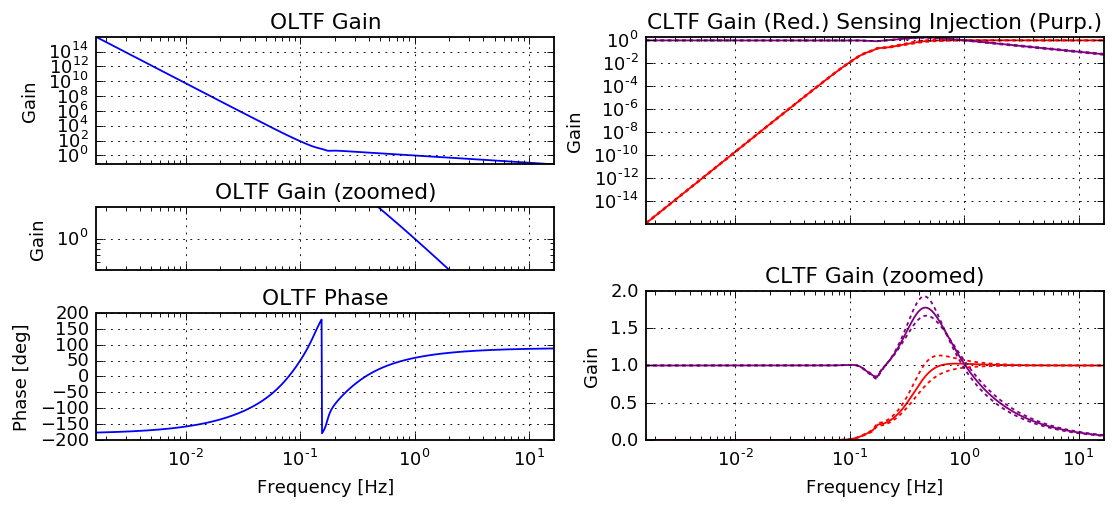

In [5]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.1 + 1j
z2 =   -1 + 1j

N = 7
F = logspaced(.01, 100, 1000)

ba = scipy.signal.cheby1(N, .2, 1, analog = True, output='zpk')
Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = Fzp(F, z2, p2)# * Fzp(F, z2, p2)
hp = 1/(-1j * F)**(N+1)
Fx, h_cheby = scipy.signal.freqresp(ba, F)

rescale = 6
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = hp * hrg / h_cheby
hd = hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd, full = True)
#axF.save("ISC_example_order7")


[ 1.]


(array([-0.01443326+0.20498341j, -0.04044110+0.16438394j,
        -0.05843908+0.0912262j , -0.06486248-0.j        ,
        -0.05843908-0.0912262j , -0.04044110-0.16438394j,
        -0.01443326-0.20498341j, -0.20000000+0.2j       ]),
 array([-0.020+0.2j, -0.002+0.j , -0.002+0.j , -0.002+0.j , -0.002+0.j ,
        -0.002+0.j , -0.002+0.j , -0.002+0.j ]),
 array([ 1.04194385]))

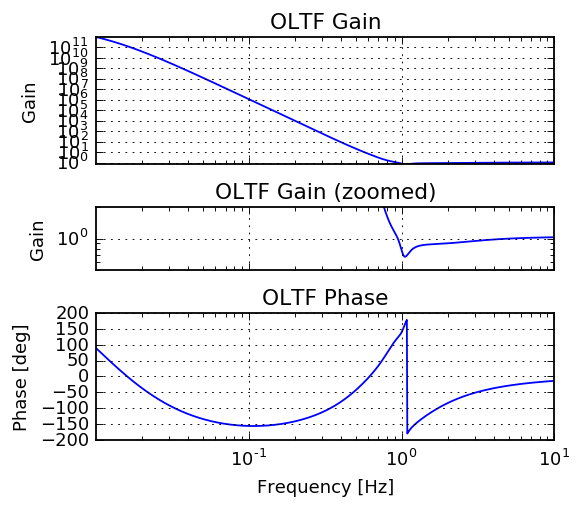

In [6]:
import scipy.signal

def cheby_boost_7(
    F_center = 1., 
    shift = 5.,
):
    F_center = float(F_center)
    N = 7
    z = []
    p = []
    k = 1

    zpk_cheby = scipy.signal.cheby1(N, .2, 1, analog = True, output = 'zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    z.append(-1 + 1j)
    p.append(-.1 + 1j)

    p.extend([-.01] * N)

    z = F_center/shift * np.asarray(z)
    p = F_center/shift * np.asarray(p)
    k = F_center/shift * np.asarray(k)

    Fx, hd = scipy.signal.freqresp(
        (z, p, k,), 
        F_center
    )
    k = k / abs(hd)
    return z,p,k


F = logspaced(.01, 10, 1000)
Fx, hd = scipy.signal.freqresp(
    cheby_boost_7(F_center = 5.), 5.)
print(abs(hd))
Fx, hd = scipy.signal.freqresp(
    cheby_boost_7(F_center = 5.), F)

axF = plot_loop(F, -hd, full = False)
#axF.save("ISC_example_order7")
cheby_boost_7(F_center = 1)

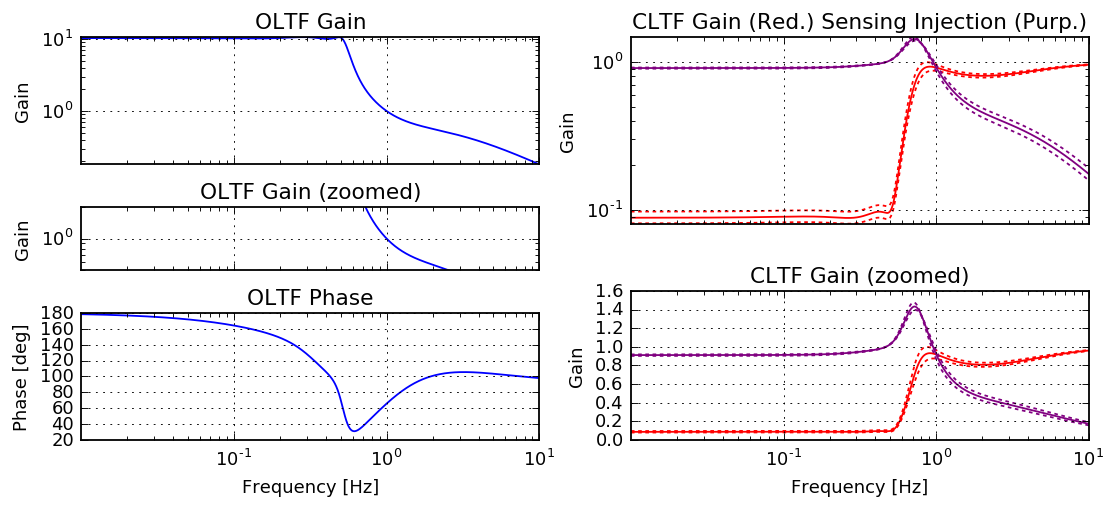

In [7]:
import scipy.signal

def ledge_controller(
    F_center = 1.,
    shift = 5.,
    N = 3,
):
    F_center = float(F_center)
    z = []
    p = []
    k = 1

    F = logspaced(.1, 100, 1000)

    Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

    hrg = 1
    #hrg *= ((1j * F + .8-.8j) * (1j * F + .8+.8j))**1

    zpk_cheby = scipy.signal.cheby1(N, .3, 1, analog = True, output='zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    zpk_cheby = scipy.signal.cheby1(N+2, .3, 1.00, analog = True, output='zpk')
    z.extend(zpk_cheby[0])
    p.extend(zpk_cheby[1])
    k = k * zpk_cheby[2]

    zpk_cheby = scipy.signal.butter(2, 2, analog = True, output='zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    zpk_cheby = scipy.signal.cheby1(1, 1, 3, analog = True, output='zpk')
    z.extend(zpk_cheby[0])
    p.extend(zpk_cheby[1])
    k = k * zpk_cheby[2]


    z = F_center/shift * np.asarray(z)
    p = F_center/shift * np.asarray(p)
    k = F_center/shift * np.asarray(k)

    Fx, hd = scipy.signal.freqresp(
        (z, p, k,), 
        F_center
    )
    k = k / abs(hd)
    return z,p,k



F = logspaced(.01, 10, 1000)
Fx, hd = scipy.signal.freqresp(
    ledge_controller(F_center = 1., shift = 2., N =3), F)

axF = plot_loop(F, hd, full = True)
#axF.save("ASC_example_order4")




In [8]:
def zpk_mult(*zpks):
    zs = []
    ps = []
    ks = 1
    for (z, p, k) in zpks:
        zs.append(z)
        ps.append(p)
        ks = ks * k
    zs = np.concatenate(zs)
    ps = np.concatenate(ps)
    return zs, ps, ks

(array([-0.03646387+0.10718601j, -0.07292773-0.j        ,
        -0.03646387-0.10718601j, -0.10000000+0.17320508j,
        -0.20000000-0.j        , -0.10000000-0.17320508j,
        -0.24000000+0.15j      , -0.24000000-0.15j      ]),
 array([-0.01289000+0.10304805j, -0.03374645+0.06368719j,
        -0.04171291-0.j        , -0.03374645-0.06368719j,
        -0.01289000-0.10304805j, -0.58956802-0.j        ,
        -0.12000000+0.15j      , -0.12000000-0.15j      ]),
 array([ 1.10486325]))

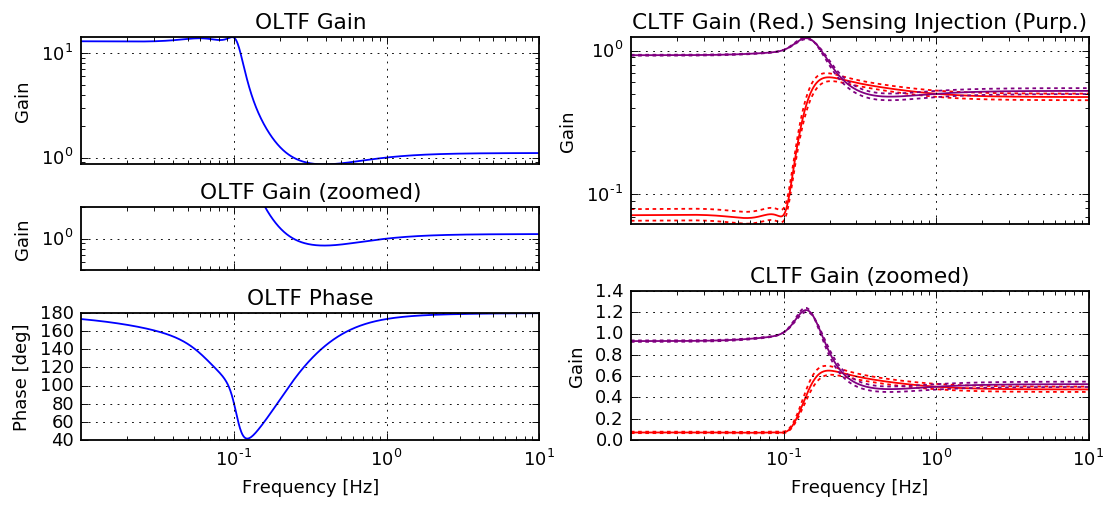

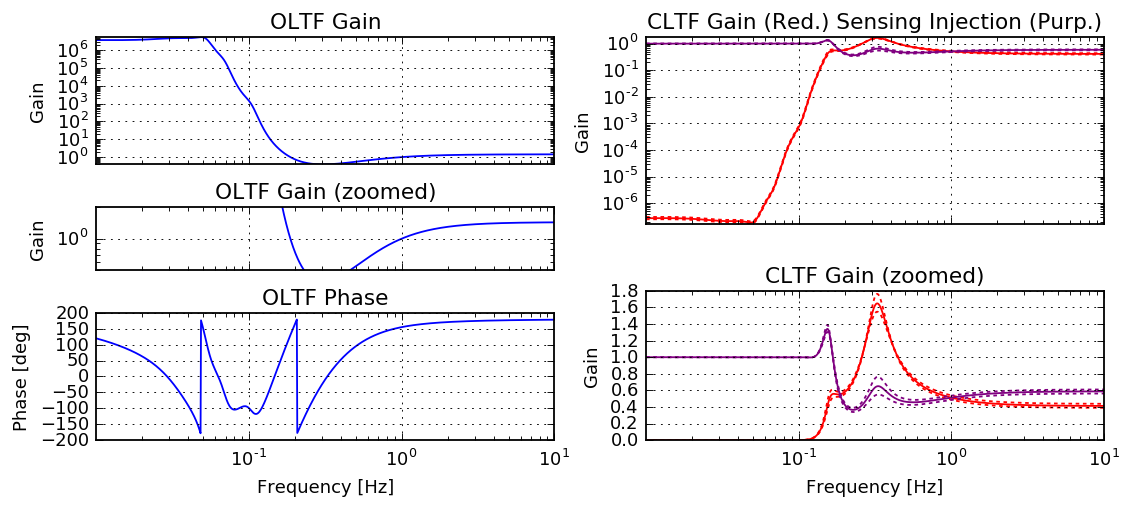

In [21]:
import scipy.signal

def ledge_controller2(
    F_center = 1.,
    shift = 5.,
    N = 3,
):
    F_center = float(F_center)
    z = []
    p = []
    k = 1

    F = logspaced(.1, 100, 1000)

    Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

    zpk_cheby = scipy.signal.cheby1(N, .3, 1, analog = True, output='zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    zpk_cheby = scipy.signal.cheby1(N+2, .3, 1.00, analog = True, output='zpk')
    z.extend(zpk_cheby[0])
    p.extend(zpk_cheby[1])
    k = k * zpk_cheby[2]

    zpk_cheby = scipy.signal.butter(3, 2, analog = True, output='zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    zpk_cheby = scipy.signal.cheby1(1, 1, 3, analog = True, output='zpk')
    z.extend(zpk_cheby[0])
    p.extend(zpk_cheby[1])
    k = k * zpk_cheby[2]

    p.append(-1.2+1.5j)
    z.append(-2.4+1.5j)
    p.append(-1.2-1.5j)
    z.append(-2.4-1.5j)
    #p.append(-1.5+1.5j)
    #z.append(-3+1.5j)
    #p.append(-1.5-1.5j)
    #z.append(-3-1.5j)

    z = F_center/shift * np.asarray(z)
    p = F_center/shift * np.asarray(p)
    k = F_center/shift * np.asarray(k)

    Fx, hd = scipy.signal.freqresp(
        (z, p, k,), 
        F_center
    )
    k = k / abs(hd)
    return z,p,k



F = logspaced(.01, 10, 1000)
Fx, hd = scipy.signal.freqresp(
    ledge_controller2(F_center = 1., shift = 10., N =3), F)

axF = plot_loop(F, hd, full = True)
#axF.save("ASC_example_order4")
Fx, hd = scipy.signal.freqresp(
    zpk_mult(
        ledge_controller2(F_center = 1., shift = 10., N =3),
        ledge_controller2(F_center = 1., shift = 15., N =3),
        ledge_controller2(F_center = 1., shift = 20., N =3),
        ledge_controller2(F_center = 1., shift = 10., N =3),
        ledge_controller2(F_center = 1., shift = 15., N =3),
        ledge_controller2(F_center = 1., shift = 20., N =3),
    ), F)

axF = plot_loop(F, hd, full = True)

ledge_controller2(F_center = 1., shift = 10., N =3)


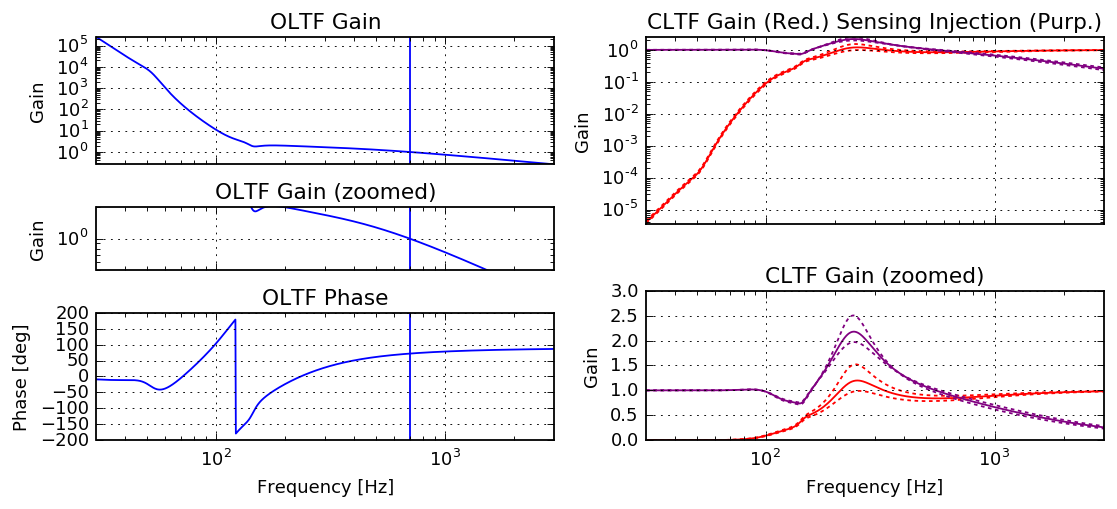

In [22]:
UGF = 700
F = logspaced(30, 3000, 1000)
Fx, hd = scipy.signal.freqresp(
    zpk_mult(
        ledge_controller(F_center = UGF, shift = 14., N =3), 
        cheby_boost_7(F_center = UGF, shift = 5),
    ),
    F)

axF = plot_loop(F, hd, full = True)
for ax in axF.ax_list:
    ax.axvline(UGF)

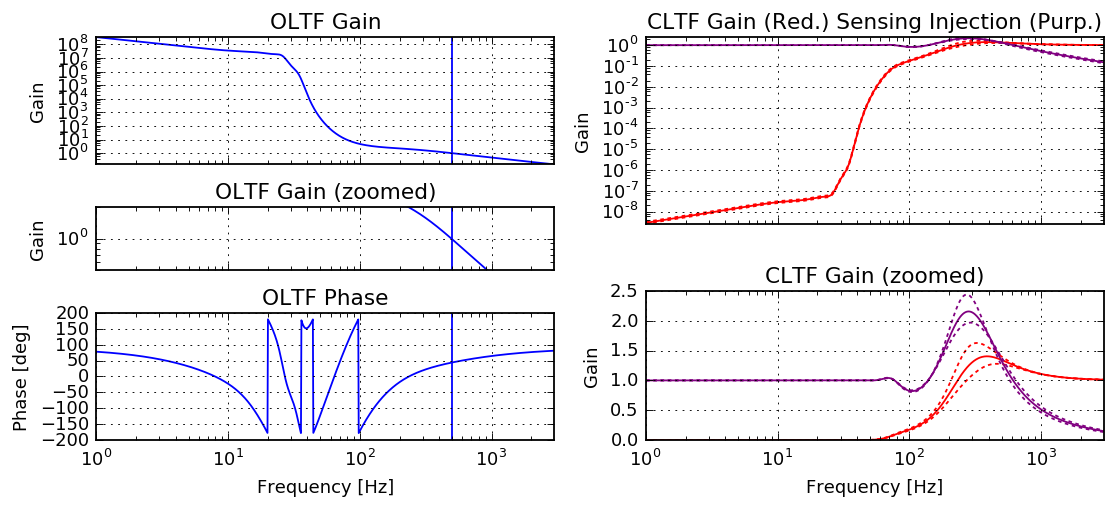

In [24]:
UGF = 500
F = logspaced(1, 3000, 1000)
Fx, hd = scipy.signal.freqresp(
    zpk_mult(
        ledge_controller(F_center = UGF, shift = 15., N =3), 
        ledge_controller2(F_center = UGF, shift = 15., N =3),
        ledge_controller2(F_center = UGF, shift = 20., N =3),
        ledge_controller2(F_center = UGF, shift = 15., N =3),
        ledge_controller2(F_center = UGF, shift = 20., N =3),
        ((-UGF,), (0,), .7)
    ),
    F)

axF = plot_loop(F, hd, full = True)
for ax in axF.ax_list:
    ax.axvline(UGF)

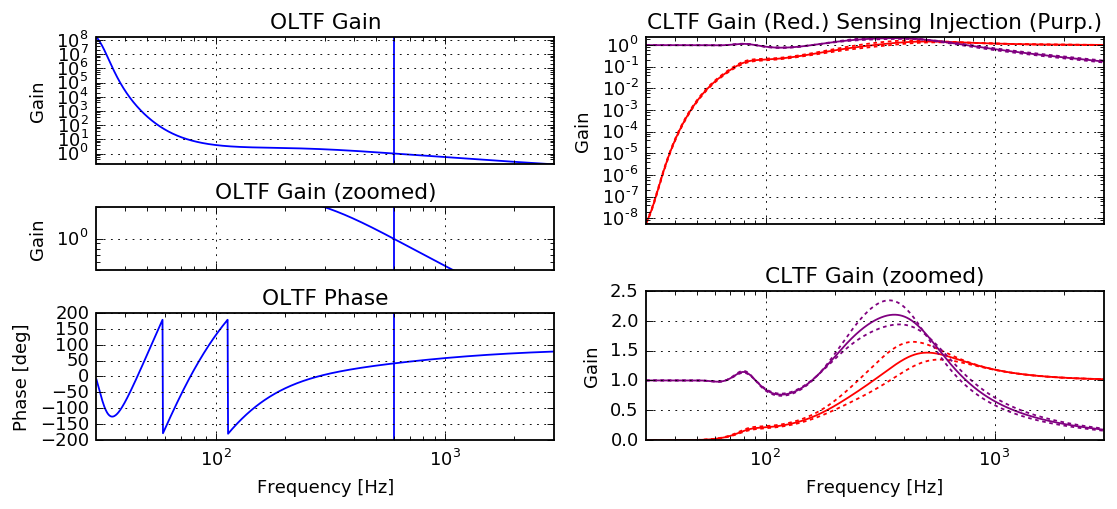

In [25]:
UGF = 600
F = logspaced(30, 3000, 1000)
Fx, hd = scipy.signal.freqresp(
    zpk_mult(
        ledge_controller(F_center = UGF, shift = 20., N =3), 
        ledge_controller2(F_center = UGF, shift = 20., N =3),
        ledge_controller2(F_center = UGF, shift = 20., N =3),
        ledge_controller2(F_center = UGF, shift = 20., N =3),
        ledge_controller2(F_center = UGF, shift = 25., N =3),
        ledge_controller2(F_center = UGF, shift = 25., N =3),
        ledge_controller2(F_center = UGF, shift = 25., N =3),
        ((-UGF,), (-.01,), .7),
        #((-30+30j,-30-30j), (-.01,-.01), 1),
    ),
    F)

axF = plot_loop(F, hd, full = True)
for ax in axF.ax_list:
    ax.axvline(UGF)

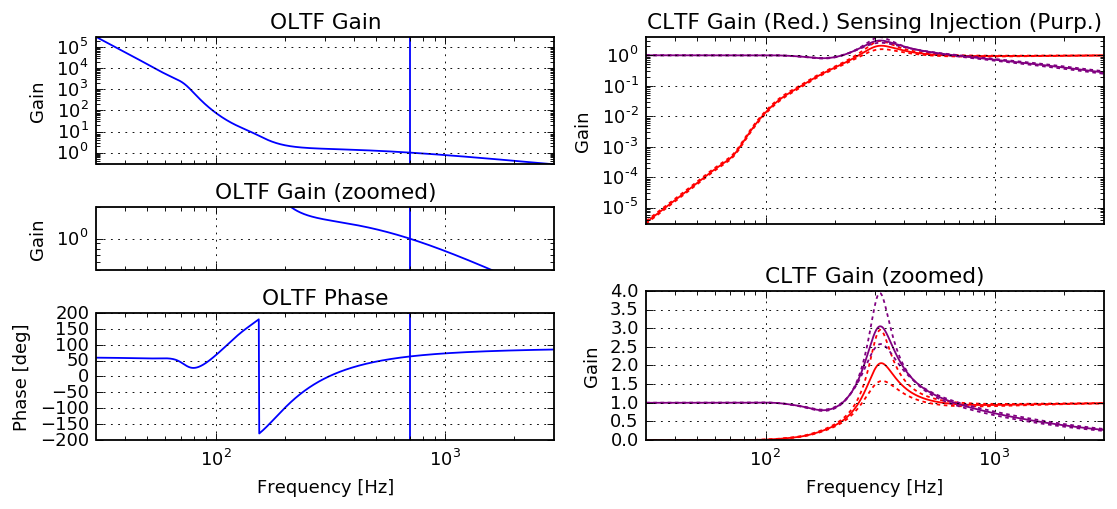

In [77]:
UGF = 700
F = logspaced(30, 3000, 1000)
Fx, hd = scipy.signal.freqresp(
    zpk_mult(
        ledge_controller(F_center = UGF, shift = 10., N =3), 
        cheby_boost(F_center = UGF, shift = 5),
    ),
    F)

axF = plot_loop(F, hd, full = True)
for ax in axF.ax_list:
    ax.axvline(UGF)

[ 1.]


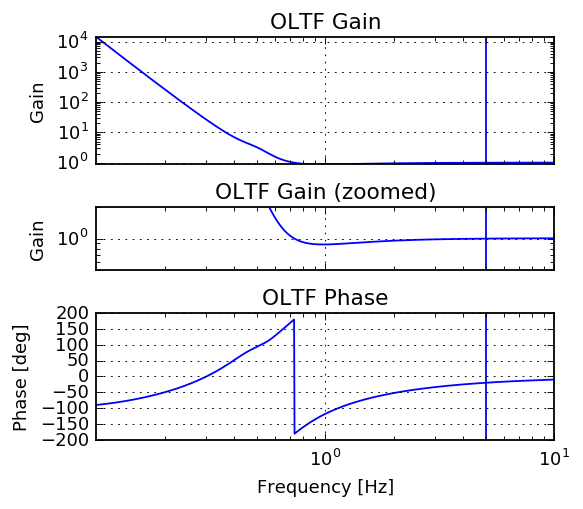

In [78]:
import scipy.signal

def cheby_boost(
    F_center = 1., 
    shift = 5.,
):
    F_center = float(F_center)
    N = 3
    N_tot = 0
    z = []
    p = []
    k = 1

    N_tot += 3
    zpk_cheby = scipy.signal.cheby1(3, .2, .8, analog = True, output = 'zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]

    N_tot += 3
    zpk_cheby = scipy.signal.cheby1(3, .2, 1, analog = True, output = 'zpk')
    z.extend(zpk_cheby[1])
    p.extend(zpk_cheby[0])
    k = k / zpk_cheby[2]
    
    z.append(-.7 + 1j)
    p.append(-.2 + 1j)
    #z.append(-.5 + .8j)
    #p.append(-.2 + .8j)

    p.extend([-.01] * N_tot)

    z = F_center/shift * np.asarray(z)
    p = F_center/shift * np.asarray(p)
    k = F_center/shift * np.asarray(k)

    Fx, hd = scipy.signal.freqresp(
        (z, p, k,), 
        F_center
    )
    k = k / abs(hd)
    return z,p,k


F = logspaced(.1, 10, 1000)
Fx, hd = scipy.signal.freqresp(
    cheby_boost_7(F_center = 5.), 5.)
print(abs(hd))
Fx, hd = scipy.signal.freqresp(
    cheby_boost(F_center = 5., shift = 10), F)

axF = plot_loop(F, -hd, full = False)
#axF.save("ISC_example_order7")

for ax in axF.ax_list:
    ax.axvline(5)

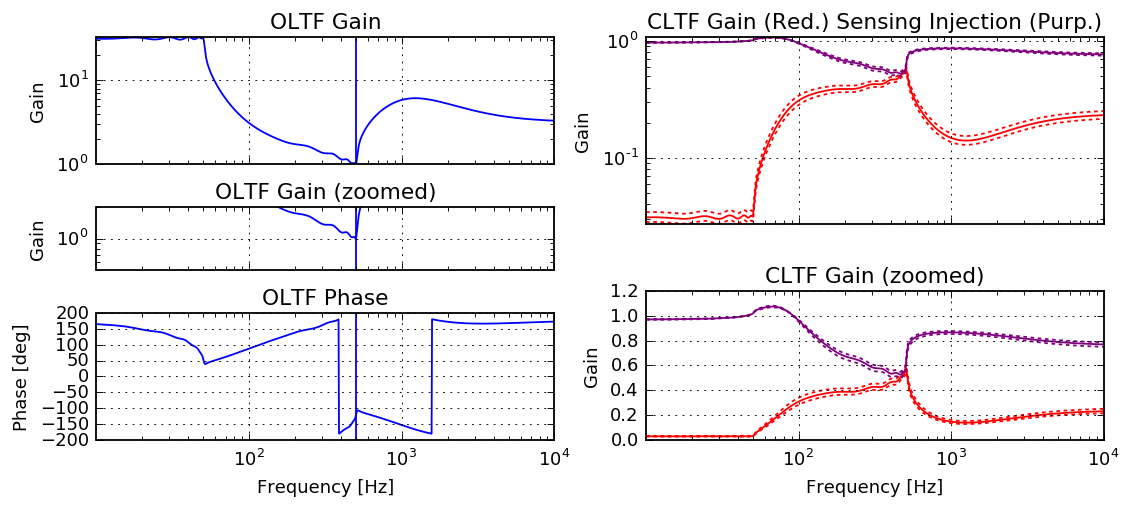

In [79]:
def zpk_div(zpkN, zpkD):
    zs = []
    ps = []
    ks = 1
    zs.append(zpkN[0])
    ps.append(zpkN[1])
    ks = ks * zpkN[2]
    
    zs.append(zpkD[1])
    ps.append(zpkD[0])
    ks = ks / zpkD[2]
    
    zs = np.concatenate(zs)
    ps = np.concatenate(ps)
    return zs, ps, ks

F = logspaced(10, 10000, 1000)
Fx, hd = scipy.signal.freqresp(
    zpk_div(
        #([],[],1), 
        ledge_controller(F_center = 500., shift = 10., N =10), 
        ledge_controller(F_center = 500., shift = 1., N =10), 
    ),
    F)

axF = plot_loop(F, hd, full = True)
for ax in axF.ax_list:
    ax.axvline(500)

In [80]:
ba

(array([], dtype=float64),
 array([-0.07216630+1.02491707j, -0.20220548+0.82191968j,
        -0.29219539+0.45613101j, -0.32431242-0.j        ,
        -0.29219539-0.45613101j, -0.20220548-0.82191968j,
        -0.07216630-1.02491707j]),
 0.071974390521584608)

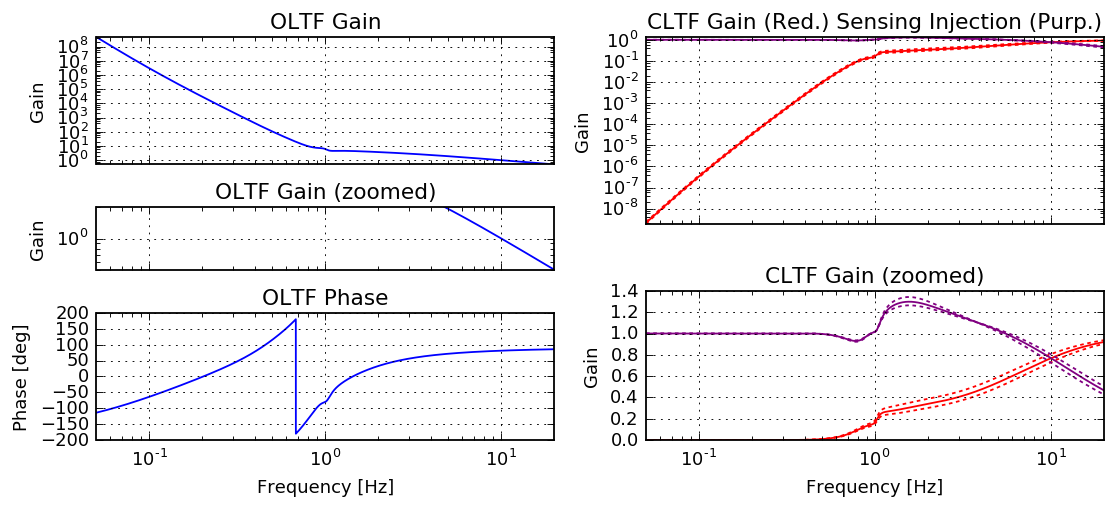

In [81]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.07 + 1j
z2 =   -1 + 1j

N = 7
F = logspaced(.05, 20, 10000)

ba = scipy.signal.cheby1(N, .2, 1, analog = True)
Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = Fzp(F, z2, p2)# * Fzp(F, z2, p2)
#hrg *= Fzp(F, -.1, -1)
hrg *= Fzp(F, -.1, -1)
hp = 1/(1j * F)**(N+1)
Fx, h_cheby = scipy.signal.freqresp(ba, F)

idx_UGF = np.searchsorted(F, 10)

hd = hp * hrg / h_cheby
hd = hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd)

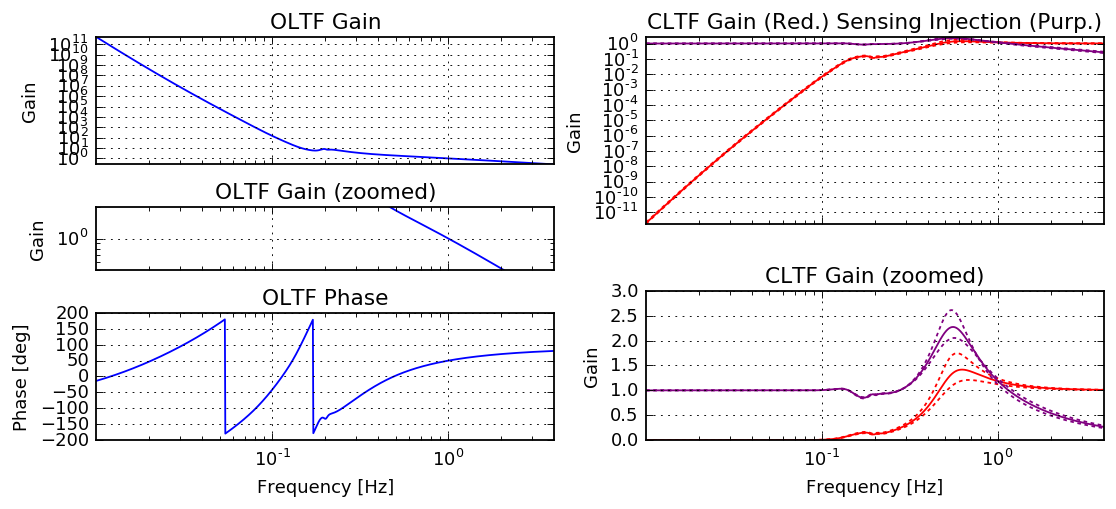

In [82]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.1 + 1j
z2 =   -1 + 1j

N = 10
F = logspaced(.05, 20, 1000)

ba = scipy.signal.cheby1(N, .2, 1, analog = True)
Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = Fzp(F, z2, p2) * Fzp(F, z, p)
#hrg *= Fzp(F, -.1, -1)
hrg *= Fzp(F, -.1, -1)
hp = 1/(1j * F)**(N+1)
Fx, h_cheby = scipy.signal.freqresp(ba, F)

rescale = 5
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = hp * hrg / h_cheby
hd = hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd)

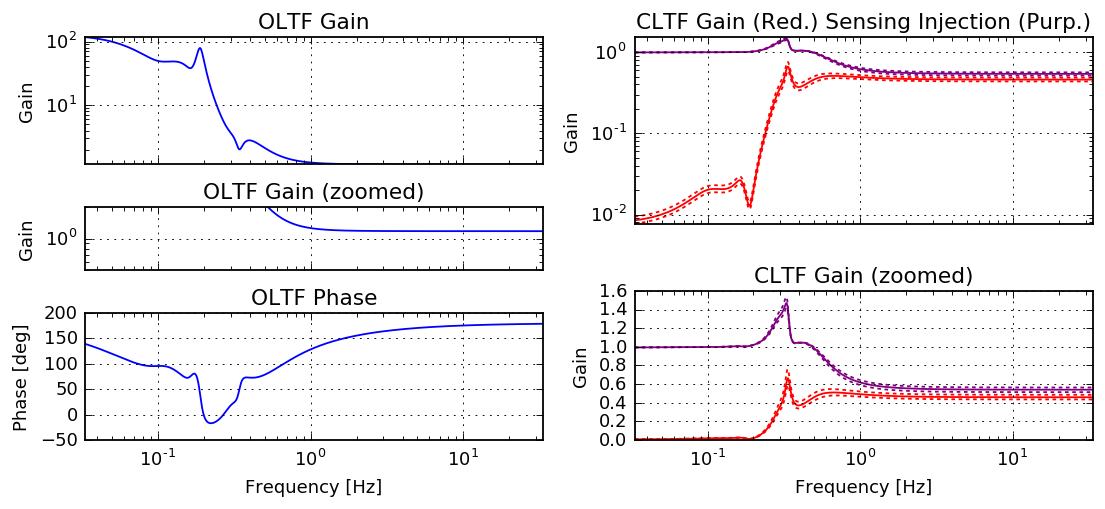

In [83]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.1 + 1j
z2 =   -1 + 1j

p3 = -.3 + 1j
z3 =   -1 + 1j

N = 8
F = logspaced(.1, 100, 1000)

Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = 1
hrg *= Fzp(F, z3, p3)
hrg *= Fzp(F, z2, p2)
hrg *= Fzp(F, .5*p2, .5*z2)
hrg *= Fzp(F, .3*p3, .3*z3)
hp = 1/(1j * F)**(N+1)

ba = scipy.signal.cheby1(N, .2, 1, analog = True)
#ba = scipy.signal.bessel(N, 1, analog = True)
Fx, h_cheby1 = scipy.signal.freqresp(ba, F)

ba = scipy.signal.cheby1(N+0, .2, 1/1.8, analog = True)
Fx, h_cheby2 = scipy.signal.freqresp(ba, F)



rescale = 3
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = (h_cheby2 / h_cheby1)
hd = hrg * hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd)
#axF.save("ASC_example_order8")



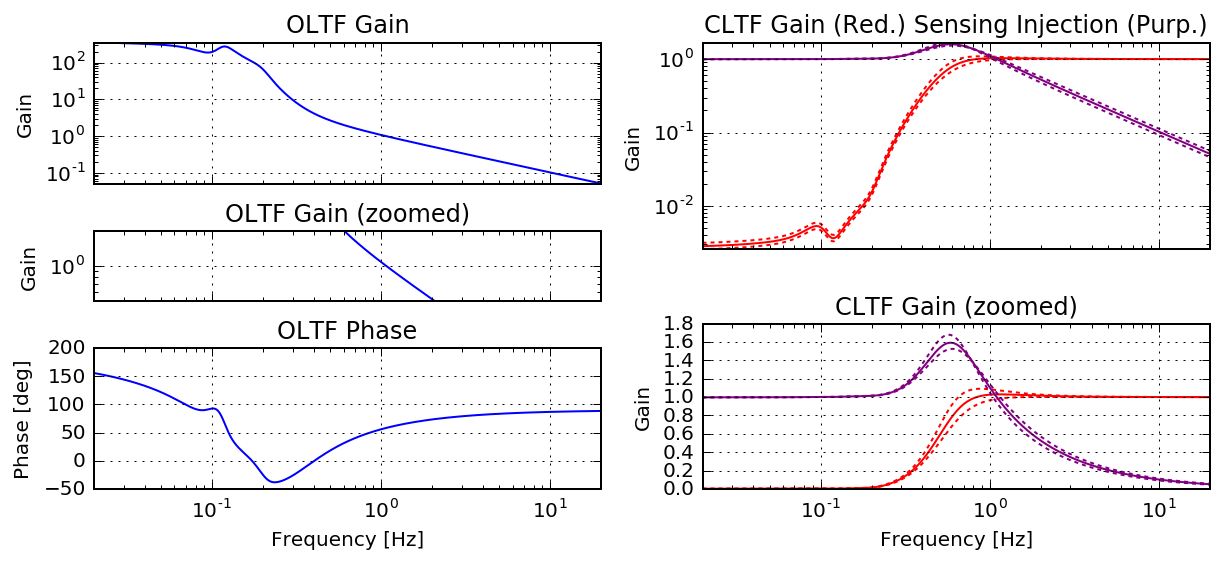

In [84]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.2 + 1j
z2 =   -1 + 1j

p3 = -.3 + 1j
z3 =   -1 + 1j

N = 4
F = logspaced(.1, 100, 1000)

Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = 1
hrg *= Fzp(F, z3, p3)
hrg *= Fzp(F, z2, p2)
hrg *= Fzp(F, .5*p2, .5*z2)

ba = scipy.signal.cheby1(N, .2, 1, analog = True)
Fx, h_cheby1 = scipy.signal.freqresp(ba, F)

ba = scipy.signal.cheby1(N+1, .2, 1/1.8, analog = True)
Fx, h_cheby2 = scipy.signal.freqresp(ba, F)

rescale = 5
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = (h_cheby2 / h_cheby1)
hd = hrg * hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd)
axF.save("ASC_example_order4")




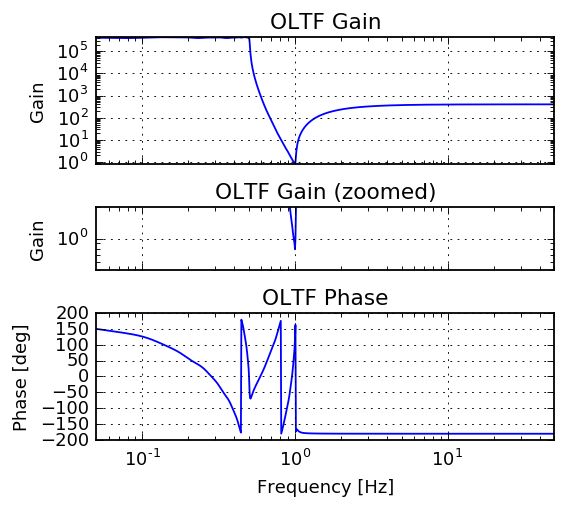

In [85]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.2 + 1j
z2 =   -1 + 1j

p3 = -.15 + 2j
z3 =   -1 + 2j

N = 10
F = logspaced(.1, 100, 1000)

Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = 1
#hrg *= ((1j * F + .8-.8j) * (1j * F + .8+.8j))**1
#hrg *= Fzp(F, z3, p3)

ba = scipy.signal.cheby1(N, .3, 1, analog = True)


Fx, h_cheby1d = scipy.signal.freqresp(ba, F)

ba = scipy.signal.cheby1(N+N, .3, 1.00, analog = True)
Fx, h_cheby1n = scipy.signal.freqresp(ba, F)
h1 = (h_cheby1n / h_cheby1d)

ba = scipy.signal.cheby1(N, .3, 2, analog = True)
Fx, h_cheby1d = scipy.signal.freqresp(ba, F)

ba = scipy.signal.cheby1(N+N, .3, 2, analog = True)
Fx, h_cheby1n = scipy.signal.freqresp(ba, F)
h2 = (h_cheby1n / h_cheby1d)



rescale = 2
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = hrg * h1 / h2
hd = hd**1
hd = hd / abs(hd[idx_UGF])

axF = plot_loop(F, hd, full = False)
#axF.save("ASC_example_order4")




In [86]:
from YALL.utilities.modpack import generate_modpack
generate_modpack()

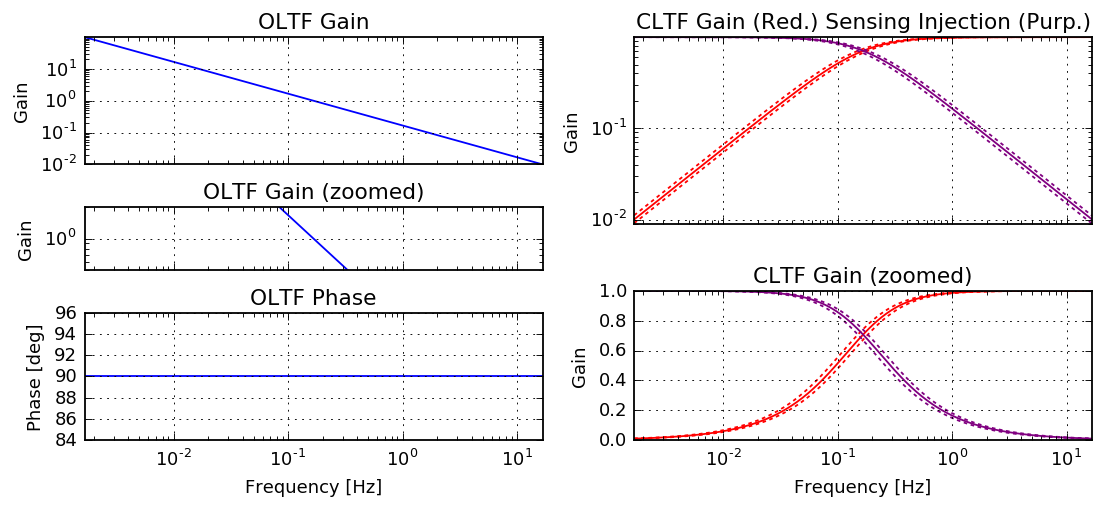

In [87]:


import scipy.signal

p = -.04 + 1j
z =   -1 + 1j

p2 = -.1 + 1j
z2 =   -1 + 1j

N = 7
F = logspaced(.01, 100, 1000)

ba = scipy.signal.cheby1(N, .2, 1, analog = True)
Fzp = lambda F, z, p : ((1j*F - z) * (1j*F - z.conjugate())) / ((1j*F - p) * (1j*F - p.conjugate()))

hrg = Fzp(F, z2, p2)# * Fzp(F, z2, p2)
hp = 1/(1j * F)**(1)
Fx, h_cheby = scipy.signal.freqresp(ba, F)

rescale = 6
F = F / rescale
idx_UGF = np.searchsorted(F, 1)

hd = hp * hrg / h_cheby
hd = hd / abs(hd[idx_UGF])

axF = plot_loop(F, hp)